# COMPUTER VISION AND PATTERN RECOGNITION PROJECT
## Task 1
## Alessandro Cesa

This Notebook contains the code for the task 1 of the project.

At first the necessary libraries have to be imported.

In [1]:
import torch.optim as optim
from torch.utils.data import DataLoader,ConcatDataset
from torchvision.datasets import ImageFolder

In [2]:
#Adjust according to your path
import sys
sys.path.append('/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/functions') #Adjust according to your path

from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

Then we'll load the dataset

In [3]:
%%capture 
#Run if you don't already have the dataset
"""
!git clone https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa.git
"""

In [4]:
#Adjust according to your path
train_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/train"
test_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/test"

We get the device (CPU or GPU)

In [5]:
device = get_default_device()

Set the seeds for reproducibility

In [6]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()

The data sets have to be transformed, using the ImageFolder function

In [7]:
train=ImageFolder(root=train_path,transform=resize_transformation)
test=ImageFolder(root=test_path,transform=resize_transformation)

We can check the size of the dataset and check the first image

In [8]:
%%capture
"""
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(train.classes)
"""

In [9]:
%%capture
"""
index=1
img,label=train[index]

print(f"label: {label}")

print("class: " + train.classes[label])
# display
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0)),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)
"""

Split training set into training and validation

In [10]:
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

We'll now create the Data Loaders, which are basically objects that make easy to iterate through the data by batches; and we'll transfer them to the GPU if available.

In [11]:
batch_size = 32
train_loader = DataLoader(training_set, batch_size=batch_size,shuffle=True,pin_memory=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

In [12]:
train_loader = DeviceDataLoader(train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

We can check the Data Loaders and a batch of data

In [13]:
%%capture
"""
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
"""

In [14]:
%%capture
"""
classes=train.classes

# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())

img=torchvision.utils.make_grid(images)
figure = plt.figure()
plt.imshow(img.cpu().numpy().transpose((1, 2, 0)).astype(np.uint8),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
"""

We can now instantiate, train and test the model 

In [15]:
model = simpleCNN().to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.0004,momentum=0.9)
# Print the model summary
#print(model)

simpleCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (fc1): Linear(in_features=4608, out_features=15, bias=True)
)


EPOCH1:
LOSS train: 2.7080834686756132 validation: 2.709959030151367 | validation_accuracy: 6.222222222222222% 
EPOCH2:
LOSS train: 2.707673192024231 validation: 2.7109193801879883 | validation_accuracy: 5.777777777777778% 
EPOCH3:
LOSS train: 2.7074856042861937 validation: 2.711177110671997 | validation_accuracy: 5.777777777777778% 
EPOCH4:
LOSS train: 2.7069859385490416 validation: 2.713294744491577 | validation_accuracy: 5.777777777777778% 
EPOCH5:
LOSS train: 2.705793434381485 validation: 2.7124738693237305 | validation_accuracy: 5.777777777777778% 
EPOCH6:
LOSS train: 2.7036907613277434 validation: 2.712118625640869 | validation_accuracy: 6.222222222222222% 
EPOCH7:
LOSS train: 2.7025950729846953 validation: 2.704118251800537 | validation_accuracy: 7.111111111111111% 
EPOCH8:
LOSS train: 2.694780695438385 validation: 2.697244882583618 | validation_accuracy: 9.333333333333334% 
EPOCH9:
LOSS train: 2.6768413901329042 validation: 2.6328015327453613 | validation_accuracy: 8.8888888888

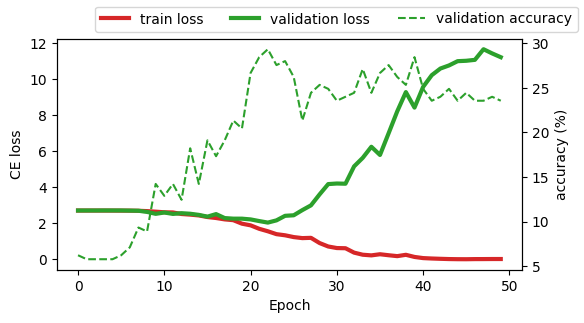

In [16]:
model_path=train_model(model,train_loader,validation_loader,loss_function,optimizer,50,device)

Accuracy of the network on the test images: 29.31323283082077%


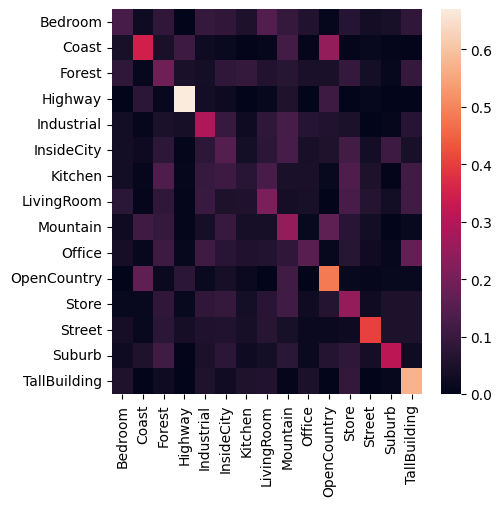

In [17]:
test_model(simpleCNN(),model_path,test_loader,test,device)

In [18]:
!rm model*